<h1>CFI Summer School 2022 Kaggle Contest</h1>

<b>Aim - </b>Predicting the price of the car described by 14 metrics

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv("/Users/jayan/OneDrive/Documents/train_data.csv")
df

,id,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage,postal_code
0,0,privat,Angebot,8990,control,bus,2007,automatik,136,b_klasse,125000,1,benzin,mercedes_benz,nein,55232
1,1,privat,Angebot,49900,test,suv,2011,automatik,400,cayenne,80000,6,benzin,porsche,nein,89155
2,2,privat,Angebot,7500,control,limousine,2005,manuell,0,a6,150000,11,diesel,audi,nein,26125
3,3,privat,Angebot,1350,control,limousine,1997,manuell,170,3er,150000,5,benzin,bmw,nein,37671
4,4,privat,Angebot,650,test,kombi,1998,automatik,170,e_klasse,150000,8,benzin,mercedes_benz,ja,45141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208759,208759,privat,Angebot,5012,control,bus,2007,manuell,134,andere,150000,10,diesel,peugeot,ja,88456
208760,208760,privat,Angebot,3600,test,kombi,2003,manuell,170,c_klasse,150000,11,benzin,mercedes_benz,nein,61137
208761,208761,privat,Angebot,4450,control,cabrio,2005,manuell,109,2_reihe,125000,11,diesel,peugeot,nein,12057
208762,208762,privat,Angebot,1600,control,limousine,1999,manuell,75,andere,125000,1,benzin,peugeot,nein,75175


In [96]:
df['seller']=df['seller'].replace(['privat'],0)
df['seller']=df['seller'].replace(['gewerblich'],1)
df['offer_type']=df['offer_type'].replace(['Angebot'],0)
df['offer_type']=df['offer_type'].replace(['Gesuch'],1)
df['abtest']=df['abtest'].replace(['test'],0)
df['abtest']=df['abtest'].replace(['control'],1)
df['vehicle_type']=df['vehicle_type'].replace(['limousine'],1)
df['vehicle_type']=df['vehicle_type'].replace(['kleinwagen'],2)
df['vehicle_type']=df['vehicle_type'].replace(['kombi'],3)
df['vehicle_type']=df['vehicle_type'].replace(['bus'],4)
df['vehicle_type']=df['vehicle_type'].replace(['cabrio'],5)
df['vehicle_type']=df['vehicle_type'].replace(['coupe'],6)
df['vehicle_type']=df['vehicle_type'].replace(['suv'],7)
df['vehicle_type']=df['vehicle_type'].replace(['andere'],8)
df['gearbox']=df['gearbox'].replace(['manuell'],0)
df['gearbox']=df['gearbox'].replace(['automatik'],1)
for i, d in enumerate(df['model'].value_counts().index.tolist()):
    df['model']=df['model'].replace([d],i+1)
for i, d in enumerate(df['fuel_type'].value_counts().index.tolist()):
    df['fuel_type']=df['fuel_type'].replace([d],i)
for i, d in enumerate(df['brand'].value_counts().index.tolist()):
    df['brand']=df['brand'].replace([d],i+1)
for i, d in enumerate(df['not_repaired_damage'].value_counts().index.tolist()):
    df['not_repaired_damage']=df['not_repaired_damage'].replace([d],i+1)

In [97]:
df=df[df['price']>0]

In [114]:
df=df[df['price']<7*10**5]

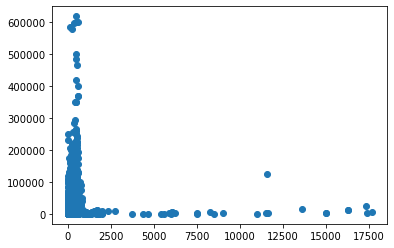

In [115]:
plt.figure()
plt.scatter(df['power'],df['price'])
plt.show()

In [116]:
X_train=df[['seller','offer_type','abtest','vehicle_type','year_of_registration','gearbox','power','model','kilometer','month_of_registration','fuel_type','brand','not_repaired_damage']]
X_train

,seller,offer_type,abtest,vehicle_type,year_of_registration,gearbox,power,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage
0,0,0,1,4,2007,1,136,64,125000,1,0,3,1
1,0,0,0,7,2011,1,400,113,80000,6,0,23,1
2,0,0,1,1,2005,0,0,13,150000,11,1,5,1
3,0,0,1,1,1997,0,170,3,150000,5,0,2,1
4,0,0,0,3,1998,1,170,11,150000,8,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208759,0,0,1,4,2007,0,134,2,150000,10,1,8,2
208760,0,0,0,3,2003,0,170,9,150000,11,0,3,1
208761,0,0,1,5,2005,0,109,17,125000,11,1,8,1
208762,0,0,1,1,1999,0,75,2,125000,1,0,8,1


In [117]:
import sklearn

In [118]:
from sklearn import linear_model

In [119]:
y_train=df['price']
y_train.head()

0     8990
1    49900
2     7500
3     1350
4      650
Name: price, dtype: int64

In [120]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [121]:
p=regr.predict([[0,0,1,4,2007,1,136,64,125000,1,0,3,1]])
print(p)

[11787.60786173]


In [122]:
dt = pd.read_csv("/Users/jayan/OneDrive/Documents/test_data.csv")
dt

,id,seller,offer_type,abtest,vehicle_type,year_of_registration,gearbox,power,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage,postal_code
0,0,privat,Angebot,control,kleinwagen,2000,manuell,75,fiesta,150000,3,benzin,ford,nein,54294
1,1,privat,Angebot,test,kombi,1995,automatik,0,e_klasse,150000,3,benzin,mercedes_benz,ja,21220
2,2,privat,Angebot,control,kleinwagen,1998,manuell,54,corsa,125000,8,benzin,opel,nein,40233
3,3,privat,Angebot,control,bus,2009,manuell,163,sprinter,125000,4,diesel,mercedes_benz,nein,93179
4,4,privat,Angebot,test,kombi,2007,manuell,87,logan,150000,5,benzin,dacia,nein,56862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52187,52187,privat,Angebot,test,limousine,2009,manuell,101,focus,60000,12,benzin,ford,nein,30625
52188,52188,privat,Angebot,test,limousine,1991,manuell,75,e_klasse,150000,9,diesel,mercedes_benz,nein,26723
52189,52189,privat,Angebot,test,cabrio,2000,automatik,54,fortwo,150000,5,benzin,smart,nein,56729
52190,52190,privat,Angebot,test,limousine,2014,automatik,230,golf,30000,8,benzin,volkswagen,nein,31303


In [123]:
dt['seller']=dt['seller'].replace(['privat'],0)
dt['seller']=dt['seller'].replace(['gewerblich'],1)
dt['offer_type']=dt['offer_type'].replace(['Angebot'],0)
dt['offer_type']=dt['offer_type'].replace(['Gesuch'],1)
dt['abtest']=dt['abtest'].replace(['test'],0)
dt['abtest']=dt['abtest'].replace(['control'],1)
dt['vehicle_type']=dt['vehicle_type'].replace(['limousine'],1)
dt['vehicle_type']=dt['vehicle_type'].replace(['kleinwagen'],2)
dt['vehicle_type']=dt['vehicle_type'].replace(['kombi'],3)
dt['vehicle_type']=dt['vehicle_type'].replace(['bus'],4)
dt['vehicle_type']=dt['vehicle_type'].replace(['cabrio'],5)
dt['vehicle_type']=dt['vehicle_type'].replace(['coupe'],6)
dt['vehicle_type']=dt['vehicle_type'].replace(['suv'],7)
dt['vehicle_type']=dt['vehicle_type'].replace(['andere'],8)
dt['gearbox']=dt['gearbox'].replace(['manuell'],0)
dt['gearbox']=dt['gearbox'].replace(['automatik'],1)
for i, d in enumerate(dt['model'].value_counts().index.tolist()):
    dt['model']=dt['model'].replace([d],i+1)
for i, d in enumerate(dt['fuel_type'].value_counts().index.tolist()):
    dt['fuel_type']=dt['fuel_type'].replace([d],i)
for i, d in enumerate(dt['brand'].value_counts().index.tolist()):
    dt['brand']=dt['brand'].replace([d],i+1)
for i, d in enumerate(dt['not_repaired_damage'].value_counts().index.tolist()):
    dt['not_repaired_damage']=dt['not_repaired_damage'].replace([d],i+1)

In [124]:
X_test=dt[['seller','offer_type','abtest','vehicle_type','year_of_registration','gearbox','power','model','kilometer','month_of_registration','fuel_type','brand','not_repaired_damage']]
X_test

,seller,offer_type,abtest,vehicle_type,year_of_registration,gearbox,power,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage
0,0,0,1,2,2000,0,75,16,150000,3,0,6,1
1,0,0,0,3,1995,1,0,11,150000,3,0,3,2
2,0,0,1,2,1998,0,54,5,125000,8,0,4,1
3,0,0,1,4,2009,0,163,88,125000,4,1,3,1
4,0,0,0,3,2007,0,87,159,150000,5,0,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52187,0,0,0,1,2009,0,101,14,60000,12,0,6,1
52188,0,0,0,1,1991,0,75,11,150000,9,1,3,1
52189,0,0,0,5,2000,1,54,22,150000,5,0,16,1
52190,0,0,0,1,2014,1,230,1,30000,8,0,1,1


In [125]:
da = pd.read_csv("/Users/jayan/OneDrive/Documents/sample_submssions.csv")
da

,id,price
0,0,1498
1,1,2121
2,2,2831
3,3,9852
4,4,3069
...,...,...
52187,52187,10247
52188,52188,-134
52189,52189,7497
52190,52190,19573


In [126]:
from sklearn.metrics import accuracy_score

In [127]:
for i in range(52192):
    t=regr.predict([X_test.iloc[i]])
    da.loc[i][1]=t

In [128]:
da.to_csv('/Users/jayan/OneDrive/Documents/sample_submssions.csv',index=False)

In [129]:
da

,id,price
0,0,1478
1,1,2004
2,2,2804
3,3,9907
4,4,2941
...,...,...
52187,52187,10257
52188,52188,-212
52189,52189,7302
52190,52190,19615
